In biometric identification system, we always deal with genuine and imposter scores. Here genuine and imposter are set of matched and non-matched 
score when we compare multiple items with one another. If we search a face image A in a database containing four other images (B, C, D and E) and find that, C and D are similar to A with matching score 0.7 and 0.8 then these are genuine scores. On the contrary the matching scores for B and E will be imposter score. I will write a small python code to draw the ROC curve using genuine and imposter score.

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [14]:
# using some randome score as genuine and imposter
genuine_score = np.random.uniform(0.5,1,[50, 1]) 
imposter_score = np.random.uniform(0.1, 0.6, [500, 1])

In [11]:
x, y =  [], []
for threshold in np.arange(0, 1, .01):
    true_positive = (genuine_score >= threshold).sum()
    true_negative = (imposter_score <= threshold).sum()
    false_positive = (genuine_score < threshold).sum()
    false_negative = (imposter_score > threshold).sum()
    
    if(true_positive + false_negative > 0 and false_positive + true_negative > 0):
        true_positive_rate = true_positive/float(true_positive + false_negative)
        false_positive_rate = false_positive/float(true_negative+false_positive)
        
        x.append(false_positive_rate)
        y.append(true_positive_rate)
    
    

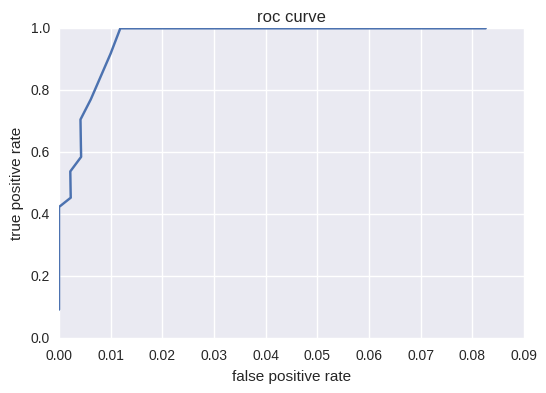

In [13]:
sns.plt.plot(x, y)
sns.plt.xlabel("false positive rate")
sns.plt.ylabel("true positive rate")
sns.plt.title("roc curve")